<h1 style="text-align:center;">Лабораторная работа №6</h2>

<h2 style="text-align:center;">Решение жесткой системы однородных 
дифференциальных уравнений "\n" неявными методами</h2>

<h3 style="text-align:center;">Тулупов Николай Дмитриевич</h3>
<h3 style="text-align:center;">Б01-204</h3>

### **Введение**

Цель: решить выбранную задачу перечисленными методами:   

0) Попробовать явный метод из лабы 2
1) Неявные методы Рунге-Кутта 3+ порядка
2) Невные методы Адамса / ФДН (методы Гира) 3+ порядка
3) Метод Розенброка-Ваннера 2, 3+ порядка   
4) методы Гира в представлении Нордсика 
     
<img src="images\task.png" alt="drawing" width="750"/>

**Чем отличаются жесткие системы?**   
 У них есть быстро затухающие компоненты и медленно меняющиеся одновременно. Поэтому при решении обычными (явными) методами нужно брать очень маленький шаг, иначе решение разлетается.

**Почему неявные методы лучше для жёстких?**   
Потому что они устойчивы при больших шагах даже для "резких" уравнений!

**Что такое уравнение Ван-дер-Поля?**    
https://ru.wikipedia.org/wiki/Осциллятор_Ван_дер_Поля     
Это нелинейное дифференциальное уравнение, описывающее нелинейный колебательный контур (например, с диодами, лампами, транзисторами). Оно впервые появилось в радиотехнике.   
Где используется: электрические цепи (аналог генератора), биомедицинские модели (сердечный ритм), нелинейная динамика, теория автоколебаний



In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [65]:
t_0 = 0
t_1 = 5
Y0 = [2,    0]
#    y1(0) y2(0)
a1 = 1e3
a2 = 1e6
A1 = 0.5
A2 = 1 + (7 * 1e-7) 

In [66]:
def f(t, Y, a=1e3, A=0.5, omega=1.0):
    y1, y2 = Y
    dy1 = a * (-(y1**3 / 3 - y1) + y2)
    dy2 = -y1 + A * np.cos(omega * t)
    return np.array([dy1, dy2])

In [67]:
def drawing(method, f, Y0, t_start, t_stop, order, a, A, llen):
    
    h_vals = [10 ** i for i in range (-5, - 5 + llen)]
    x_vals = [0]*llen
    y_vals = [0]*llen

    for i in range(llen):
        S = method(f, Y0, t_start, t_stop, h_vals[i], order, a, A)
        x_vals[i] = [p[1] for p in S]
        y_vals[i] = [p[2] for p in S]
    fig, axs = plt.subplots(int(llen/3), 3, figsize=(15, (4 * llen / 3)))  # llen/3 строки, 3 столбца

    axs = axs.flatten()  # чтобы обращаться как axs[0], axs[1], ...

    for i in range(llen):
        axs[i].plot(x_vals[i], y_vals[i])
        axs[i].set_title(f"Шаг h = {h_vals[i]}")
        axs[i].set_xlabel('x')
        axs[i].set_ylabel('y')
        axs[i].axis('equal')  # чтобы не искажалась орбита
        axs[i].grid(True)

    method_name = method.__name__

    # Красивое название (преобразуем имя функции)
    if "adams_explicit" in method_name:
        method_display = "явный Адамса"
    elif "adams_implicit" in method_name:
        method_display = "неявный Адамса" 
    elif "runge_kutt_explicit" in method_name:
        method_display = "явный Рунге-Кутты"
    elif "runge_kutt_implicit" in method_name:
        method_display = "неявный Рунге-Кутты"
    elif "fdn" in method_name:
        method_display = "ФДН"
    elif "integrate_gear" in method_name:
        method_display = "Гира"
    elif "integrate_rosenbrock" in method_name:
        method_display = "Розенброка_Ваннера"
    else:
        method_display = method_name  # fallback

    fig.suptitle(f"Траектория-утка уравнения Ван-дер-Поля\nМетод {method_display} {order} порядка, a = {a}, A = {A}", fontsize=16)
    plt.tight_layout()
    plt.show()

### **Явные методы**

Используем явный метод Рунге-Кутты из прошлой лабы, изменив лишь передаваемую вектор-функцию f и начальный столбец Y0.

In [68]:
def runge_kutt_explicit(f, t, Y, h, order, a, A):
    Y = np.array(Y)

    if order == 1:
        k1 = f(t, Y, a, A)
        return Y + h * k1

    elif order == 2:
        k1 = f(t, Y, a, A)
        k2 = f(t + h, Y + h * k1, a, A)
        return Y + h * (k1 + k2) / 2

    elif order == 3:
        k1 = f(t, Y, a, A)
        k2 = f(t + h / 2, Y + h * k1 / 2, a, A)
        k3 = f(t + h, Y - h * k1 + 2 * h * k2, a, A)
        return Y + h * (k1 + 4 * k2 + k3) / 6

    elif order == 4:
        k1 = f(t, Y, a, A)
        k2 = f(t + h / 2, Y + h * k1 / 2, a, A)
        k3 = f(t + h / 2, Y + h * k2 / 2, a, A)
        k4 = f(t + h, Y + h * k3, a, A)
        return Y + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6

    else:
        print("ERROR! Порядок должен быть от 1 до 4")
        return 

In [69]:
def integrate_runge_kutt_explicit(f, Y0, t_start, t_stop, h, order, a, A):
    t = t_start
    Y = np.array(Y0)
    S = [[t] + Y.tolist()]

    while t < t_stop:
        Y = runge_kutt_explicit(f, t, Y, h, order, a, A)
        t += h
        S.append([t] + Y.tolist())

    return S

C:\Users\pc\AppData\Local\Temp\ipykernel_9032\2893876179.py:3: RuntimeWarning: overflow encountered in scalar power
  dy1 = a * (-(y1**3 / 3 - y1) + y2)
C:\Users\pc\AppData\Local\Temp\ipykernel_9032\2893876179.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  dy1 = a * (-(y1**3 / 3 - y1) + y2)


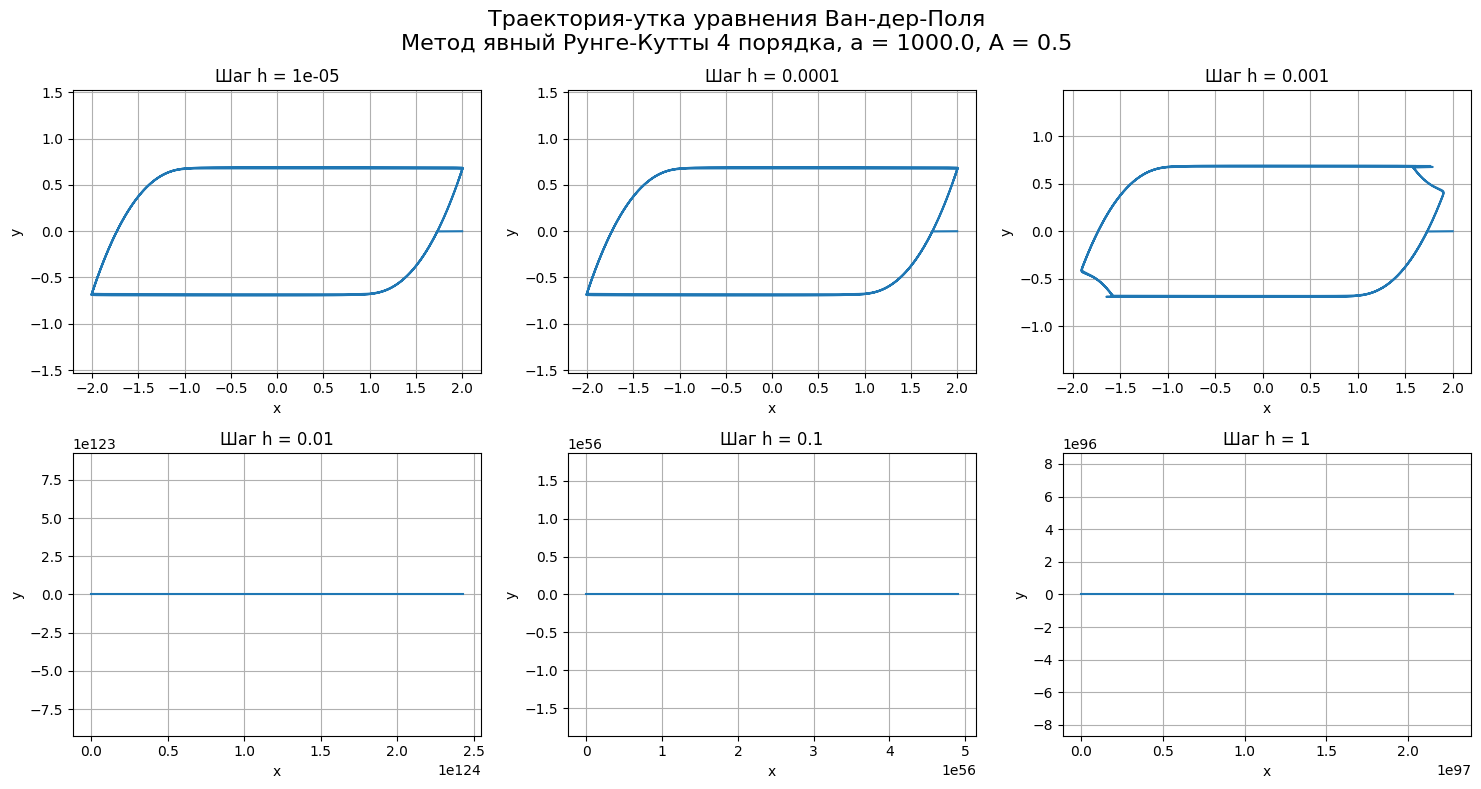

In [70]:
drawing(integrate_runge_kutt_explicit, f, Y0, t_start=t_0, t_stop=t_1, order=4, a=a1, A=A1, llen=6)

**Выводы:**     
1) **Траектория-утка**    
при шаге 0,001 явная "утка" - система какое то время движется по медленному (устойчивому) отрезку, потом резко срывается - "нос" или "клюв" утки  

2) **Большой шаг**   
при большом шаге уже возникает переполнение, видим предупреждения   
RuntimeWarning: overflow encountered in scalar power   
  $dy_1 = a * (-(y_1^3 / 3 - y_1) + y_2)$   
  $y$ улетает в числа типа 1e123, в таком масштабе производные становятся почти нулевыми -> $Y_{next} ≈ Y + h * 0 = Y$, поэтому движение прекращается и получается почти горизонтальная линия.
Не будем интегрировать с большим шагом - это бессмысленно.

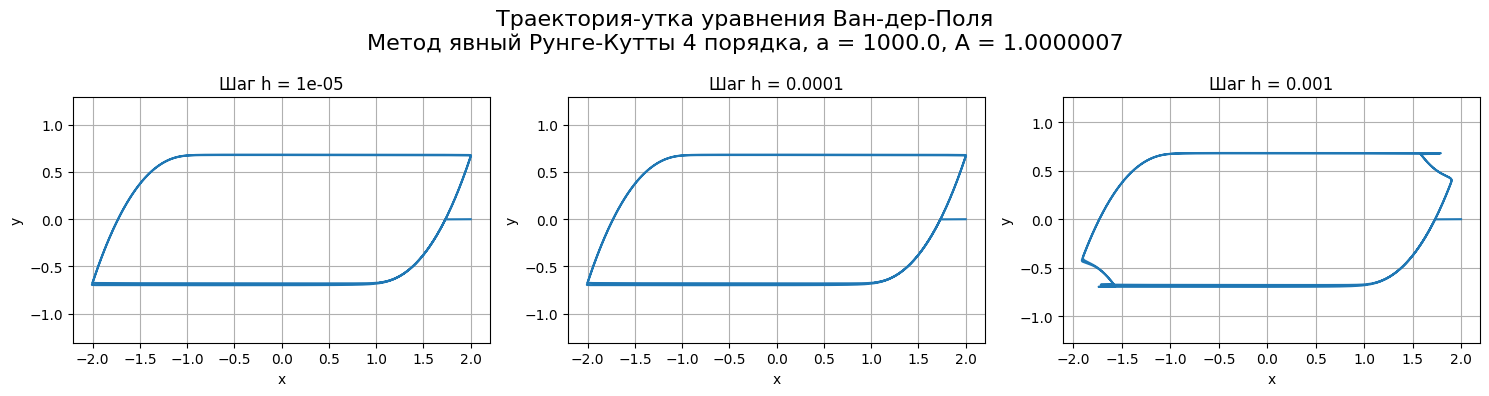

In [71]:
drawing(integrate_runge_kutt_explicit, f, Y0, t_start=t_0, t_stop=t_1, order=4, a=a1, A=A2, llen=3)

C:\Users\pc\AppData\Local\Temp\ipykernel_9032\2893876179.py:3: RuntimeWarning: overflow encountered in scalar power
  dy1 = a * (-(y1**3 / 3 - y1) + y2)
C:\Users\pc\AppData\Local\Temp\ipykernel_9032\2893876179.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  dy1 = a * (-(y1**3 / 3 - y1) + y2)


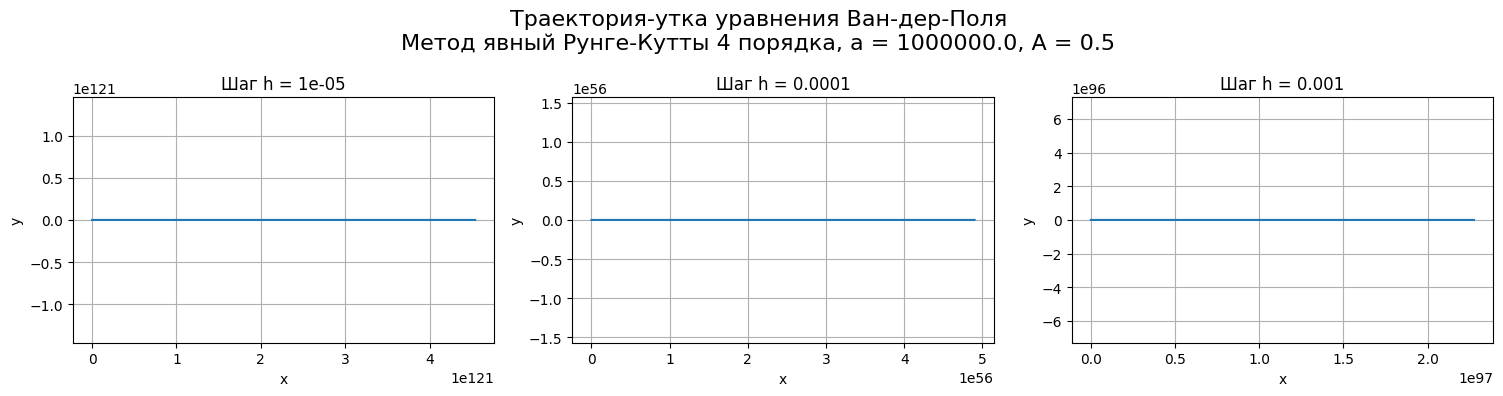

In [72]:
drawing(integrate_runge_kutt_explicit, f, Y0, t_start=t_0, t_stop=t_1, order=4, a=a2, A=A1, llen=3)

**Выводы:**     
3) **Оценим максимальное значение шага, при котором траектория еще выглядит нужным образом.**
$$
h_{max} = 2 / \lambda_{max}
$$   
Получим якобиан системы и посчитаем при $a_1$ и $a_2$:
$$
J =
\begin{bmatrix}
-3a & 0 \\
-1 & 0  
\end{bmatrix}
$$
Тогда  $$h_{max} \approx 2 / a$$.      
$h_{max_{1}} \approx 2 / a_1 = 0.002$   
$h_{max_{2}} \approx 2 / a_2 = 0.000002$ - интегрирование с таким шагом занимает больше 15мин...   
Получается, константа $a$ напрямую влияет на жесткость системы, а значит, на максимальный допустимый шаг.



4) **на что влияет A?**  
A — амплитуда внешнего колебательного воздействия. В якобиан она не входит, а значит, на жескость напрямую не влияет, и на максимальный шаг тоже.
Что делает параметр A?

а. При A = 0
Это автономная система    
Решение — предельный цикл (замкнутая орбита в фазовом пространстве)   
Поведение устойчивое и регулярно колебательное   

б. При 0 < A < 1   
Система слабо возмущена   
Фазовые траектории начинают немного меняться по форме   
Возможны биения, псевдопериодичность   

в. При A ≈ 1   
Появляется тонкая граница между устойчивостью и хаосом      
Система может войти в резонанс, возбуждение может усиливать колебания       
Начинаются неустойчивые "утки" — траектории с длинным "клювом"      
г. При A > 1      
Входит в хаотический режим       
При определённых ω появляются:       
странные аттракторы     
непериодические траектории     
сенситивность к начальному условию    

### **Неявные методы Рунги-Кутта 3+ порядка**

Начнем с метода 2 порядка. Вспомним, что в лабе 3 прошлого сема мы написали метод Ньютона и МПИ для решения систем нелинейных алгебраических уравнений.   
В Ньютоне надо было считать якобиан, поэтому используем старый МПИ (а в нем старого Гаусса...)
   
Формула метода $y_{n+1} = y_n + h/2 * (f(t_n, y_n) + f(t_{n+1}, y_{n+1}))$

In [73]:
def norm3_vect(vect):
    return pow(sum(el**2 for el in vect), 0.5)

def matr_multipl(A, B):
    
    if A.shape[1] != B.shape[0]: return 
    AB = np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                AB[i][j] += A[i][k] * B[k][j]
    
    return AB

def swap_rows(A, row1, row2): #функция для смены строк в матрице
    A[[row1, row2]] = A[[row2, row1]]

def swap_columns(A, col1, col2): #функция для смены столбцов в матрице
    A[:, [col1, col2]] = A[:, [col2, col1]]

def find_max_el(A, iter): #функция для поиска главного элемента матрицы A[iter,iter]
    size = len(A) - iter
    main_element = A[iter,iter]
    i_main, j_main = iter, iter

    for i in range(iter, size): 
        for j in range(iter, size):
            if abs(A[iter:, iter:][i][j]) > abs(main_element):
                i_main, j_main = i, j
                main_element = A[iter:, iter:][i][j]
    return main_element, i_main, j_main

def gauss(A, f):
    size = len(A)
    if A.shape[0] != A.shape[1]:
        print("Матрица не квадратная, решение невозможно!")
        return 
    x = np.arange(size) #массив с порядком корней (порядок будет меняться при перестановке столбцов)

    #прямой ход алгоритма - приводим матрицу A к верхнетреугольному виду
    for iter in range(len(A)):
        ''' Добавим в алгоритм проверку - если на какой-то итерации алгоритма возникла нулевая строка - ответ будет выражаться 
        через одну из переменных (её берем за константу, все остальные переменные будут выражены через нее)'''
        if (len(A) != sum(int(np.any(el)) for el in A)):
            '''Количество переменных превышает количество уравнений, решение не однозначн'''
            print("ERROR! Матрица не квадратная, решение невозможно!")
            return 
        
        main_el, i_main, j_main = find_max_el(A, iter) #максимальный элемент текущей матрицы и его местонахождение
        
        if (i_main != iter): #если элемент еще не в нулевой строке
            swap_rows(A, iter, i_main) #меняем в текущей матрице нулевую строку и строку, содержащую главный элемент            
            swap_rows(f, iter, i_main) #то же самое - в столбце решений       
            
        if (j_main != iter): #если элемент еще не в нулевом столбце
            swap_columns(A, iter, j_main) #меняем в текущей матрице нулевой столбец и столбец, содержащий главный элемент
            #swap_columns(x, iter, j_main) #то же самое - в строке порядка переменных
            x[iter], x[j_main] = x[j_main], x[iter]
        
        if main_el != 0:
            A[iter:, iter:][0] /= main_el #делим нулевую строку текущей матрицы на главный элемент
            f[iter] /= main_el #делим нулевую строку текущего столбца решений на главный элемент
        else:
            print("ERROR! main_el = 0")
            return
    
        for i in range(size - iter - 1):   
            f[i+iter+1] -= (f[iter] * A[iter:, iter:][i+1][0])
            #вычитаем из каждого элемента нулевой в текущем столбце решений, умноженный на нулевой элемент нужной строки - получаем в начале каждой строки единицу
            A[iter:, iter:][i+1] -=  (A[iter:, iter:][0] * A[iter:, iter:][i+1][0])
            #вычитаем из каждой строки нулевую, умноженную на нулевой элемент нужной строки - получаем в начале каждой строки единицу
        
    f[-1] /= A[-1][-1]
    A[size-1][size-1] = 1


    
    #обратный ход алгоритма
    U  = np.zeros((size, 1)) #столбец решений
    for i in range(size-1, -1, -1):
        U[i] = f[i]
        for j in range(i + 1, size):
            U[i] -= U[j] * A[i][j]

    #перестановка переменных в изначальном порядке
    ans = np.zeros((size, 1))
    for i in range(size):
        ans[int(x[i])] = U[i]
    
    return ans




def FPI_(fx, fy, x0, y0, eps=1e-6, max_iter=100):
    x = x0
    y = y0
    iter = 0

    while iter < max_iter:
        try:
            f_x = fx(x, y)
            f_y = fy(x)
            
            # Проверка на допустимость значений
            if not (isinstance(f_x, (int, float)) and isinstance(f_y, (int, float))):
                raise ValueError(f"Некорректное значение: f_x={f_x}, f_y={f_y}")
            
            # Критерий остановки
            if (abs(x - f_x) < eps) and (abs(y - f_y) < eps):
                return x, y, iter 
            
            # Обновление значений
            x = f_x
            y = f_y
        
        except ValueError as e:
            print(f"Ошибка на итерации {iter + 1}: {e}")
            break
        
        iter += 1
    
    print("Превышено максимально допустимое количество итераций.")
    return x, y, iter

In [74]:
# Неявный метод Рунге–Кутты 2+ порядка через метод простой итерации
def runge_kutt_implicit(f, t, Y, h, order, a=a1, A=A1, eps=1e-4, max_iter=20):
    Y = np.array(Y)
    f_n = f(t, Y, a, A)
    t_next = t + h

    if order == 2:
        # Метод трапеций (2-й порядок)
        Y_next = Y + h * f_n  # начальное приближение (Эйлер)
        for _ in range(max_iter):
            f_next = f(t_next, Y_next, a, A)
            Y_new = Y + h / 2 * (f_n + f_next)
            if np.linalg.norm(Y_new - Y_next, ord=2) < eps:
                return Y_new
            Y_next = Y_new
        # print("FPI WARNING: метод 2 порядка не сошелся")
        return Y_next

    elif order == 3:
        # Метод Гаусса (2 стадии, 3 порядок)
        sqrt3 = np.sqrt(3)
        c1 = 0.5 - sqrt3 / 6
        c2 = 0.5 + sqrt3 / 6

        A_rk = np.array([
            [0.25, 0.25 - sqrt3 / 6],
            [0.25 + sqrt3 / 6, 0.25]
        ])
        b = np.array([0.5, 0.5])
        c = np.array([c1, c2])

        s = 2  # число стадий
        K = np.tile(f_n, (s, 1))  # начальное приближение: просто f_n дважды

        for _ in range(max_iter):
            K_new = np.zeros_like(K)
            for i in range(s):
                arg = Y + h * sum(A_rk[i, j] * K[j] for j in range(s))
                t_i = t + c[i] * h
                K_new[i] = f(t_i, arg, a, A)

            if np.linalg.norm(K_new - K) < eps:
                break
            K = K_new
        #else:
            #print("WARNING: метод 3 порядка не сошелся")

        Y_next = Y + h * sum(b[i] * K[i] for i in range(s))
        return Y_next
    
    elif order == 4:
        # Начальное приближение для k1 и k2
        k1 = f(t, Y, a, A)
        k2 = f(t + h, Y + h * k1, a, A)  # просто для инициализации

        for _ in range(max_iter):
            Y1 = Y + h * (0.5 * k1)
            Y2 = Y + h * (0.5 * k1 + 1.0 * k2)

            new_k1 = f(t,     Y1, a, A)
            new_k2 = f(t + h, Y2, a, A)

            # проверка сходимости
            if np.linalg.norm(new_k1 - k1) < eps and np.linalg.norm(new_k2 - k2) < eps:
                k1, k2 = new_k1, new_k2
                break

            k1, k2 = new_k1, new_k2

        Y_next = Y + h * (0.5 * k1 + 0.5 * k2)
        return Y_next

    else:
        print("ERROR! Поддерживаются только порядки 2, 3, 4")



In [75]:
# Интегратор
def integrate_runge_kutt_implicit(f, Y0, t_start, t_stop, h, order=2, a=a1, A=A1):
    t = t_start
    Y = np.array(Y0)
    S = [[t] + Y.tolist()]

    while t < t_stop:
        Y = runge_kutt_implicit(f, t, Y, h, order, a, A)
        t += h
        S.append([t] + Y.tolist())

    return S

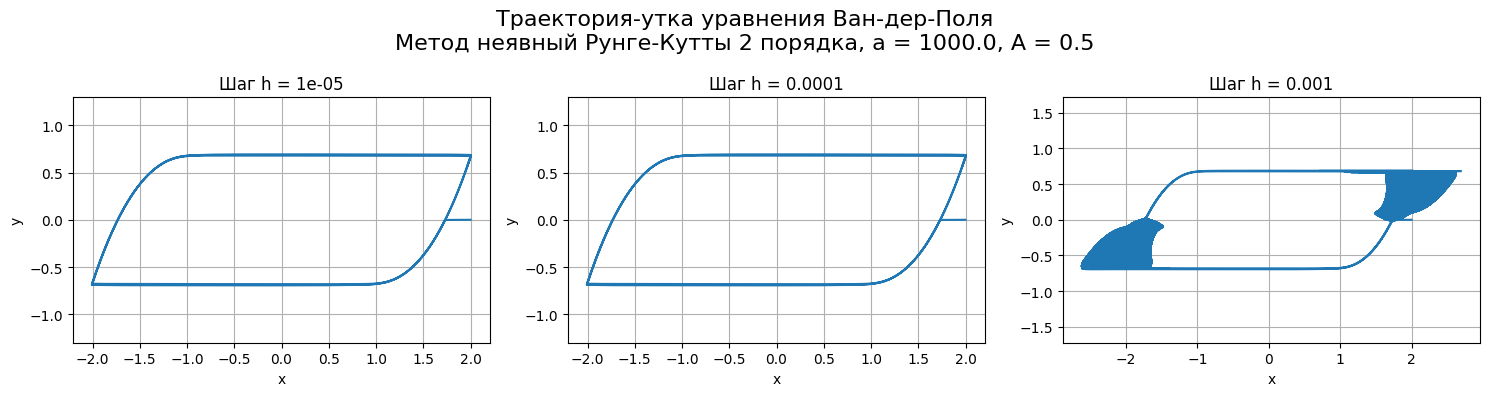

In [76]:
drawing(integrate_runge_kutt_implicit, f, Y0, t_start=t_0, t_stop=t_1, order=2, a=a1, A=A1, llen=3)

Как видим, уже при шаге в 0,001 МПИ не успевает улавливать быстрые изменения и перестает сходиться за максимальное установленное количество итераций

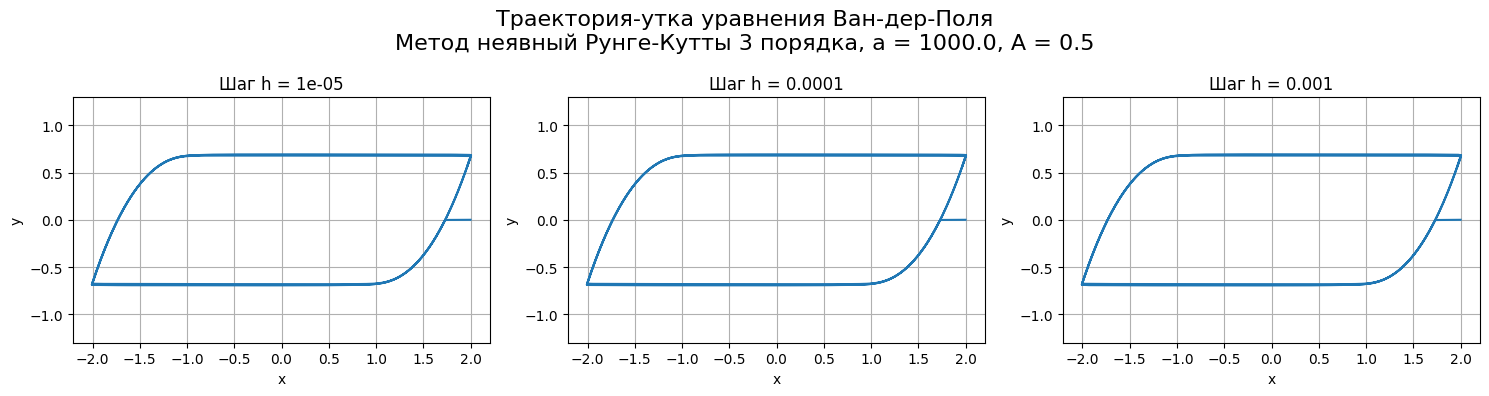

In [77]:
drawing(integrate_runge_kutt_implicit, f, Y0, t_start=t_0, t_stop=t_1, order=3, a=a1, A=A1, llen=3)

C:\Users\pc\AppData\Local\Temp\ipykernel_9032\2893876179.py:3: RuntimeWarning: overflow encountered in scalar power
  dy1 = a * (-(y1**3 / 3 - y1) + y2)
C:\Users\pc\AppData\Local\Temp\ipykernel_9032\2893876179.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  dy1 = a * (-(y1**3 / 3 - y1) + y2)
C:\Users\pc\AppData\Local\Temp\ipykernel_9032\3477036908.py:38: RuntimeWarning: invalid value encountered in add
  arg = Y + h * sum(A_rk[i, j] * K[j] for j in range(s))


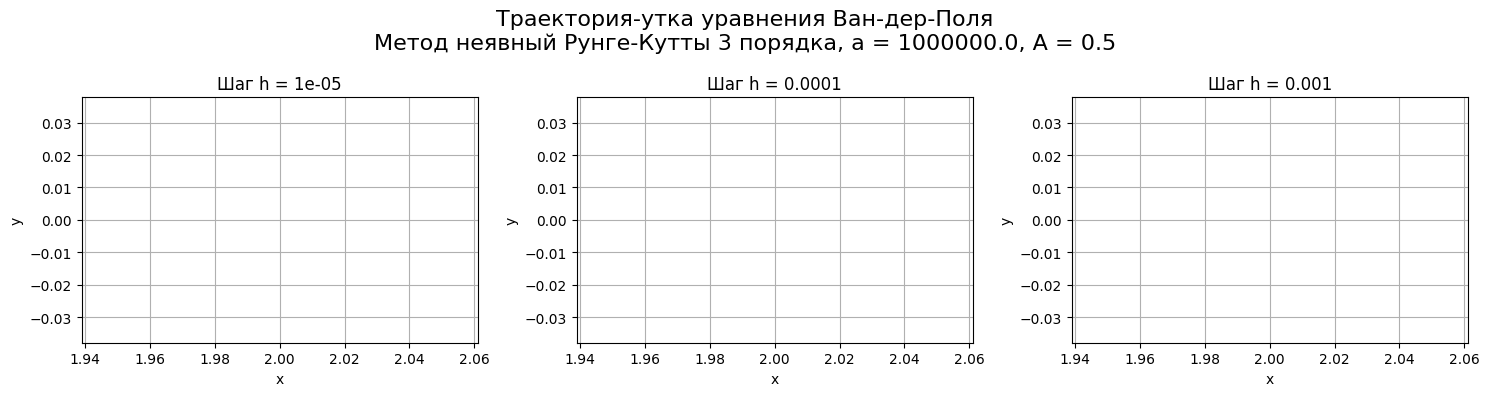

In [78]:
drawing(integrate_runge_kutt_implicit, f, Y0, t_start=t_0, t_stop=t_1, order=3, a=a2, A=A1, llen=3)

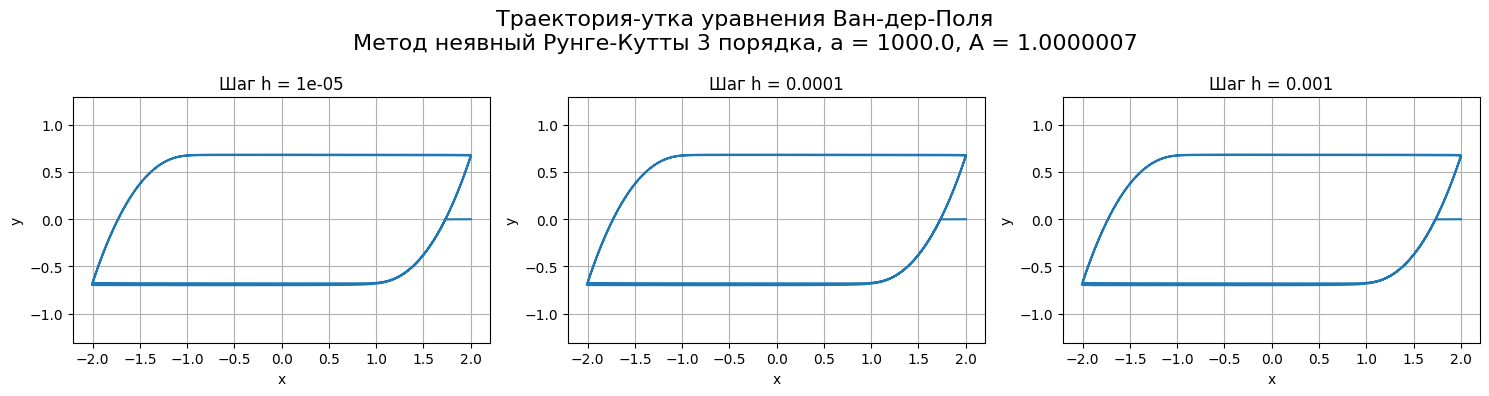

In [79]:
drawing(integrate_runge_kutt_implicit, f, Y0, t_start=t_0, t_stop=t_1, order=3, a=a1, A=A2, llen=3)

C:\Users\pc\AppData\Local\Temp\ipykernel_9032\2893876179.py:3: RuntimeWarning: overflow encountered in scalar power
  dy1 = a * (-(y1**3 / 3 - y1) + y2)
C:\Users\pc\AppData\Local\Temp\ipykernel_9032\2893876179.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  dy1 = a * (-(y1**3 / 3 - y1) + y2)


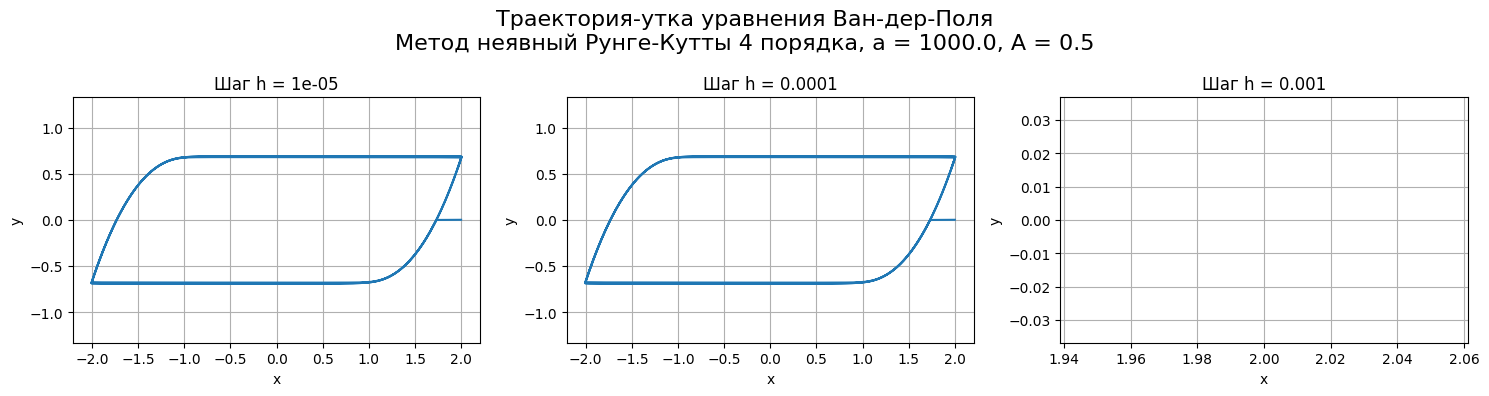

In [80]:
drawing(integrate_runge_kutt_implicit, f, Y0, t_start=t_0, t_stop=t_1, order=4, a=a1, A=A1, llen=3)

### **Неявные методы Адамса-Мултона 3+ порядка**

In [81]:
def adams_implicit(f_vals, y_curr, h, order):
    if order == 2:
        coeffs = [5/12, 8/12, -1/12]
    elif order == 3:
        coeffs = [9/24, 19/24, -5/24, 1/24]
    elif order == 4:
        coeffs = [251/720, 646/720, -264/720, 106/720, -19/720]
    elif order == 5:
        coeffs = [95/288, 1427/1440, -133/240, 241/720, -173/1440, 3/160]
    else:
        print("ERROR! Порядок должег быть от 2 до 5")
    
    y_next = np.array([
        y_curr[i] + h * sum(coeffs[j] * f_vals[j][i] for j in range(len(coeffs)))
        for i in range(len(y_curr))
    ])
    return y_next

In [82]:
def integrate_adams_implicit(f, Y0, t_start, t_stop, h, order, a, A, eps=1e-5, max_iter=50):
    steps = int((t_stop - t_start) / h)
    t = t_start
    Y_hist = [np.array(Y0)]
    f_hist = [f(t_start, Y0, a, A)]
    times = [t_start]

    for _ in range(order - 1):
        Y_next = runge_kutt_explicit(f, t, Y_hist[-1], h, order=4, a=a, A=A)
        t += h
        Y_hist.append(Y_next)
        f_hist.append(f(t, Y_next, a, A))
        times.append(t)

    S = [[times[i]] + list(Y_hist[i]) for i in range(order)]

    for _ in range(steps - (order - 1)):
        y_curr = Y_hist[-1]
        t_next = t + h
        y_next = y_curr.copy()

        for _ in range(max_iter):
            f_next = f(t_next, y_next, a, A)
            f_vals = [f_next] + f_hist[::-1]
            y_new = adams_implicit(f_vals, y_curr, h, order)
            if np.linalg.norm(y_new - y_next) < eps:
                break
            y_next = y_new
        #else:
            #print("WARNING: не сошлось на шаге t =", t_next)

        t = t_next
        f_next = f(t, y_next, a, A)
        times.append(t)
        S.append([t] + list(y_next))
        Y_hist.append(y_next)
        f_hist.append(f_next)
        Y_hist = Y_hist[-order:]
        f_hist = f_hist[-order:]

    return S

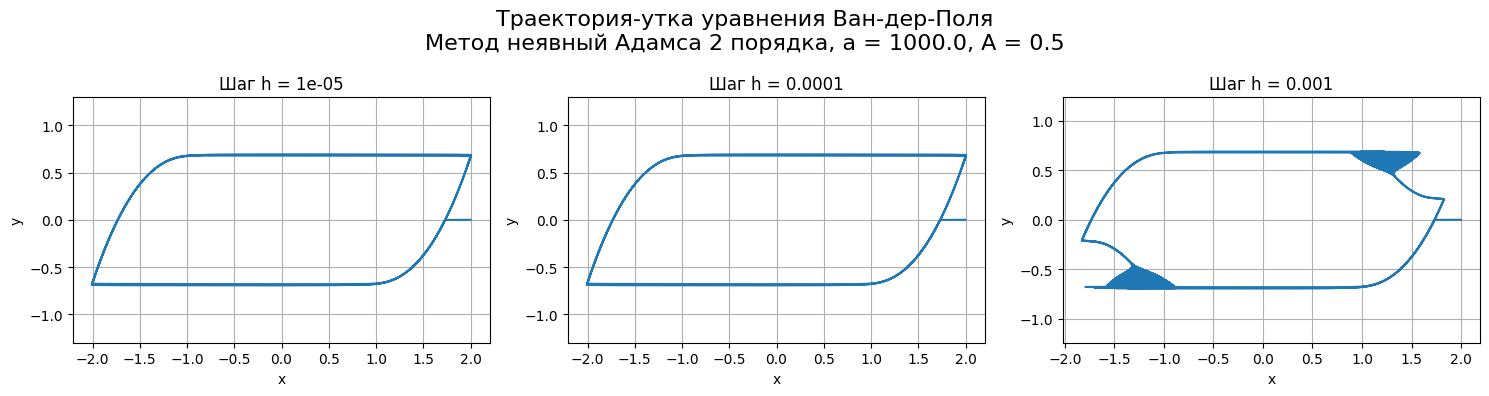

In [83]:
drawing(integrate_adams_implicit, f, Y0, t_start=t_0, t_stop=t_1, order=2, a=a1, A=A1, llen=3)

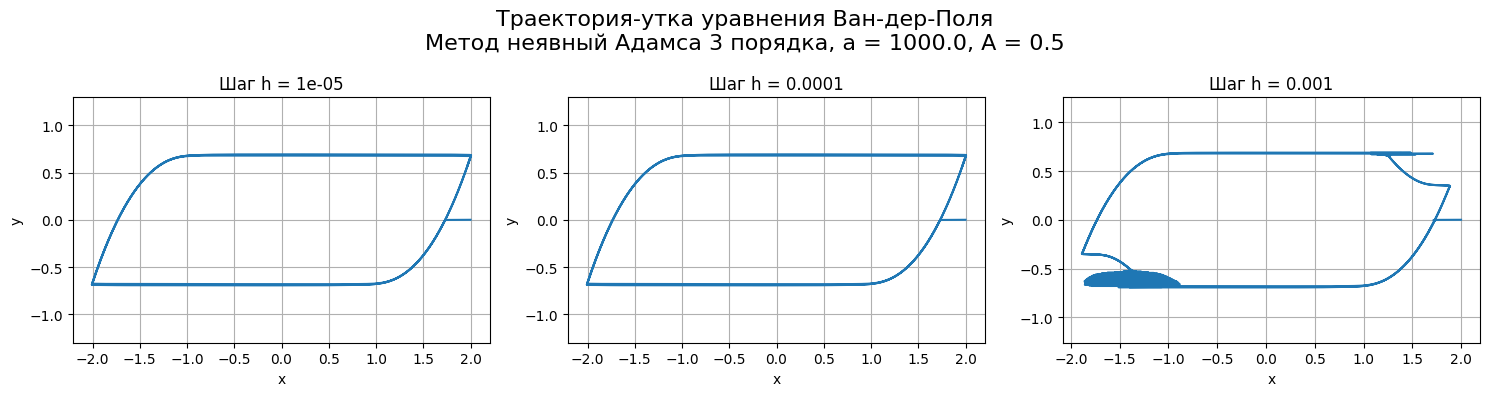

In [84]:
drawing(integrate_adams_implicit, f, Y0, t_start=t_0, t_stop=t_1, order=3, a=a1, A=A1, llen=3)

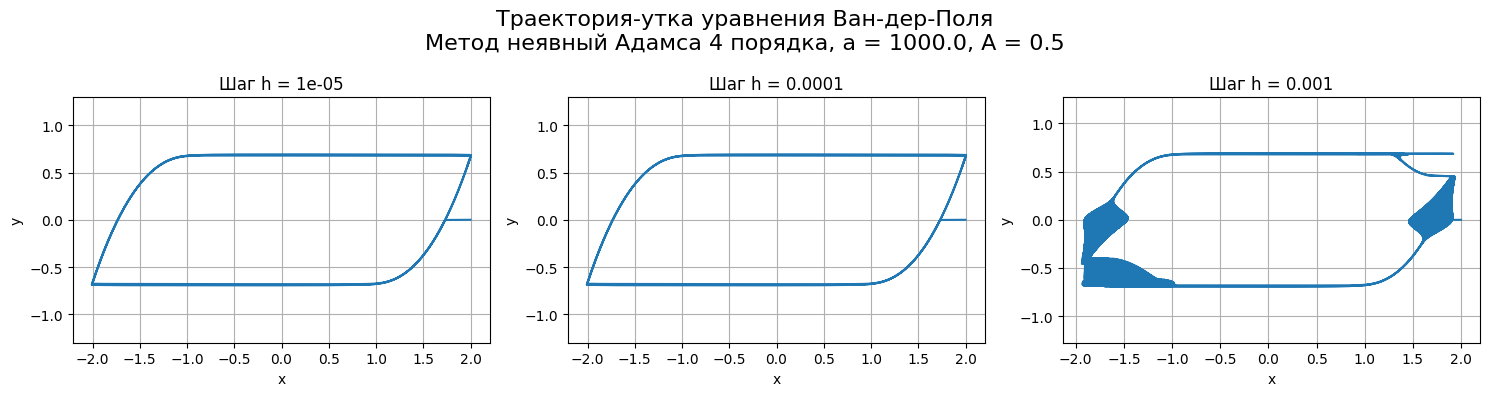

In [85]:
drawing(integrate_adams_implicit, f, Y0, t_start=t_0, t_stop=t_1, order=4, a=a1, A=A1, llen=3)

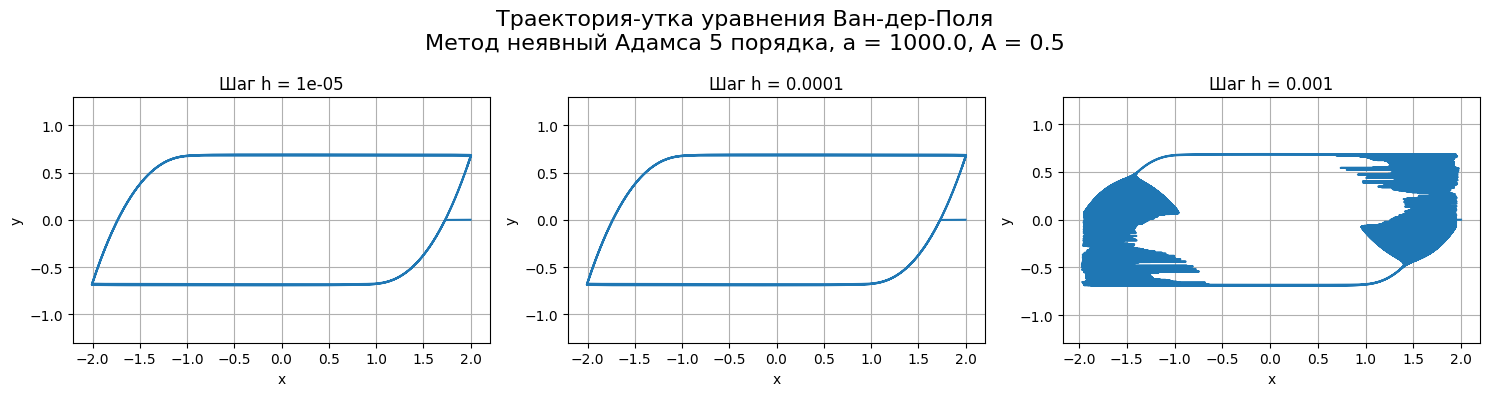

In [86]:
drawing(integrate_adams_implicit, f, Y0, t_start=t_0, t_stop=t_1, order=5, a=a1, A=A1, llen=3)

Почему Адамс 5 уже разлетается на шаге 0,001
1. Чувствительность к погрешностям
Методы высокого порядка, особенно неявные, при фиксированном шаге более чувствительны к ошибкам на предыдущих шагах:
Каждый шаг учитывает больше значений f_n, f_{n-1}, ..., и если ошибка накопилась в одном — она размазывается по следующему.
Если на каком-то этапе итерации y_next получилась не очень точной -> ошибка «разносится» по всем следующим шагам сильнее, чем в 3-м порядке.

2. Метод простой итерации (МПИ) может не успевать:
При более высоком порядке уравнение становится жёстче в смысле численного решения, а наш МПИ остаётся прежним.
При h = 0.001 МПИ может не сходиться как надо, а мы всё равно берём результат.

3. Низкая устойчивость метода при большом порядке
Порядок 5 — это уже на грани устойчивости для жёстких ОДУ.

Из теоремы Далквиста - методы линейной многоточечности (как Адамс) не могут быть одновременно устойчивыми и выше порядка 2 для жёстких задач, если они явные или слабо неявные.

### **Неявные методы Гира 3+ порядка**

In [87]:
def gear_implicit(f_vals, y_hist, h, order):
    if order == 2:
        coeffs = [1.0, -1.0]
        gamma = 1.0
    elif order == 3:
        coeffs = [1.5, -2.0, 0.5]
        gamma = 2.0 / 3.0
    elif order == 4:
        coeffs = [11/6, -3.0, 1.5, -1/3]
        gamma = 6/11
    elif order == 5:
        coeffs = [25/12, -4.0, 3.0, -4/3, 0.25]
        gamma = 12/25
    else:
        raise ValueError("Порядок метода Гира должен быть от 2 до 5")

    predictor = sum(coeffs[i] * y_hist[-(i+1)] for i in range(order))
    y_next = predictor.copy()
    
    return y_next, gamma

In [88]:
def integrate_gear(f, Y0, t_start, t_stop, h, order, a, A, eps=1e-6, max_iter=50):
    import numpy as np

    steps = int((t_stop - t_start) / h)
    t = t_start
    Y_hist = [np.array(Y0)]
    times = [t_start]

    for _ in range(order - 1):
        Y_next = runge_kutt_explicit(f, t, Y_hist[-1], h, order=4, a=a, A=A)
        t += h
        Y_hist.append(Y_next)
        times.append(t)

    S = [[times[i]] + list(Y_hist[i]) for i in range(order)]

    for _ in range(steps - (order - 1)):
        y_hist = Y_hist[-order:]
        t_next = t + h
        y_next, gamma = gear_implicit(None, y_hist, h, order)

        for _ in range(max_iter):
            f_next = f(t_next, y_next, a, A)
            y_new = y_hist[-1] + gamma * h * f_next
            if np.linalg.norm(y_new - y_next) < eps:
                break
            y_next = y_new
        #else:
            #print("WARNING: Метод Гира не сошелся на шаге t =", t_next)

        t = t_next
        times.append(t)
        S.append([t] + list(y_next))
        Y_hist.append(y_next)
        Y_hist = Y_hist[-order:]

    return S

C:\Users\pc\AppData\Local\Temp\ipykernel_9032\2893876179.py:3: RuntimeWarning: overflow encountered in scalar power
  dy1 = a * (-(y1**3 / 3 - y1) + y2)
C:\Users\pc\AppData\Local\Temp\ipykernel_9032\2893876179.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  dy1 = a * (-(y1**3 / 3 - y1) + y2)


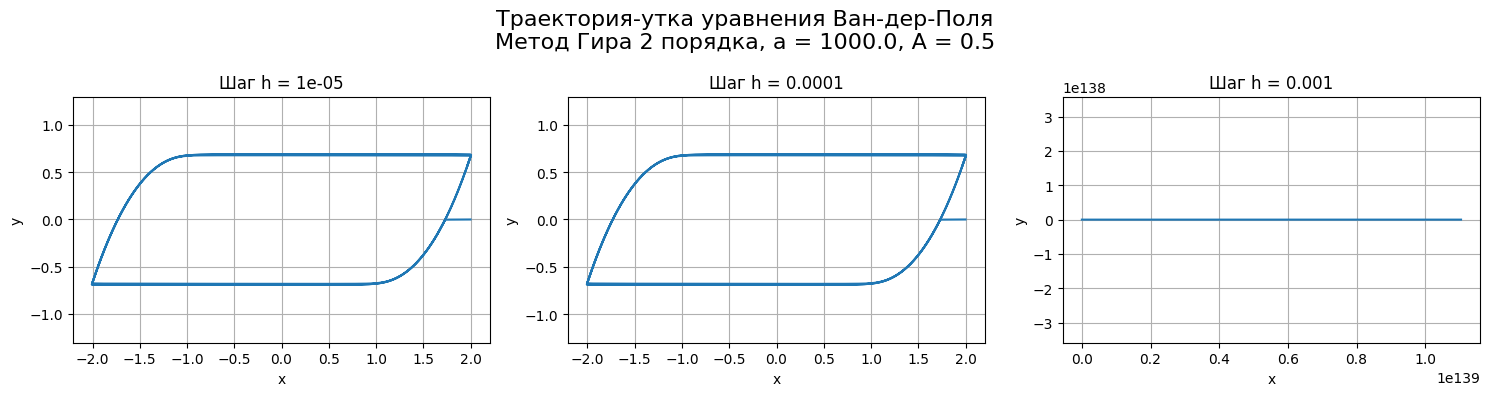

In [90]:
drawing(integrate_gear, f, Y0, t_start=t_0, t_stop=t_1, order=2, a=a1, A=A1, llen=3)

C:\Users\pc\AppData\Local\Temp\ipykernel_9032\2893876179.py:3: RuntimeWarning: overflow encountered in scalar power
  dy1 = a * (-(y1**3 / 3 - y1) + y2)
C:\Users\pc\AppData\Local\Temp\ipykernel_9032\2893876179.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  dy1 = a * (-(y1**3 / 3 - y1) + y2)


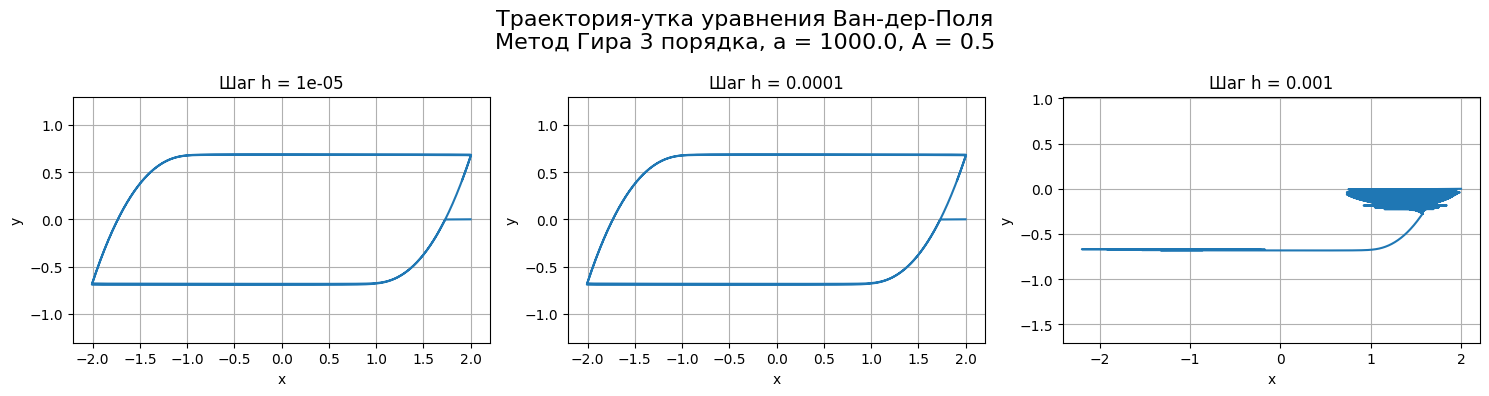

In [91]:
drawing(integrate_gear, f, Y0, t_start=t_0, t_stop=t_1, order=3, a=a1, A=A1, llen=3)

C:\Users\pc\AppData\Local\Temp\ipykernel_9032\2893876179.py:3: RuntimeWarning: overflow encountered in scalar power
  dy1 = a * (-(y1**3 / 3 - y1) + y2)
C:\Users\pc\AppData\Local\Temp\ipykernel_9032\2893876179.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  dy1 = a * (-(y1**3 / 3 - y1) + y2)


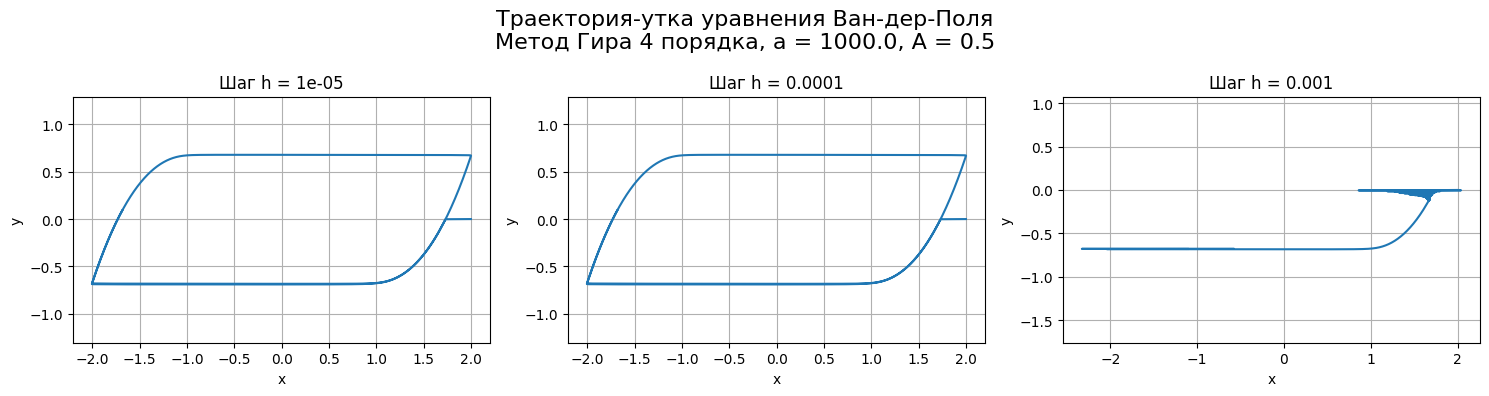

In [92]:
drawing(integrate_gear, f, Y0, t_start=t_0, t_stop=t_1, order=4, a=a1, A=A1, llen=3)

C:\Users\pc\AppData\Local\Temp\ipykernel_9032\2893876179.py:3: RuntimeWarning: overflow encountered in scalar power
  dy1 = a * (-(y1**3 / 3 - y1) + y2)
C:\Users\pc\AppData\Local\Temp\ipykernel_9032\2893876179.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  dy1 = a * (-(y1**3 / 3 - y1) + y2)


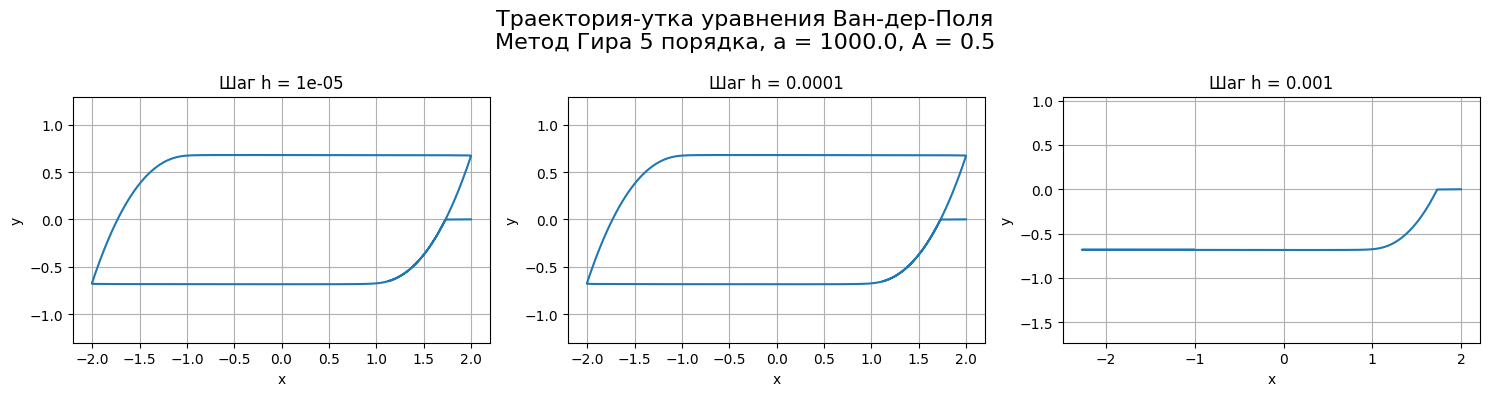

In [97]:
drawing(integrate_gear, f, Y0, t_start=t_0, t_stop=t_1, order=5, a=a1, A=A1, llen=3)


C:\Users\pc\AppData\Local\Temp\ipykernel_9032\2893876179.py:3: RuntimeWarning: overflow encountered in scalar power
  dy1 = a * (-(y1**3 / 3 - y1) + y2)
C:\Users\pc\AppData\Local\Temp\ipykernel_9032\2893876179.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  dy1 = a * (-(y1**3 / 3 - y1) + y2)


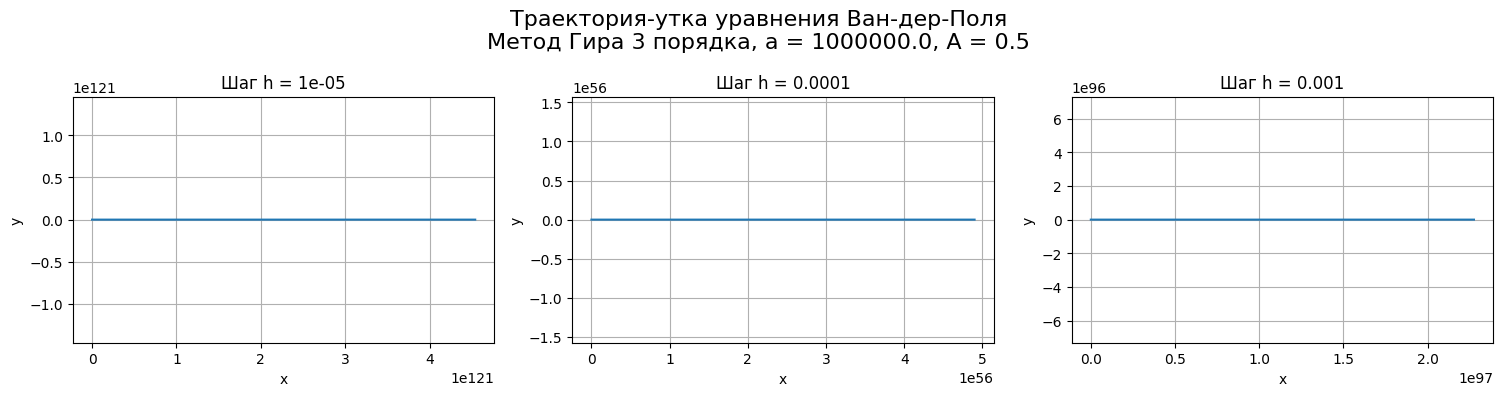

In [93]:
drawing(integrate_gear, f, Y0, t_start=t_0, t_stop=t_1, order=3, a=a2, A=A1, llen=3)

Для Гира 3 при a = 1e6 даже шаг в 1e-5 слишком большой!

### **Неявные методы Розенброка-Ваннера 2-3 порядка**

Якобиан будем считать численными методами вычисления производных.

In [99]:
import numpy as np

# Якобиан через численные производные
def numerical_jacobian(f, t, y, h=1e-6):
    n = len(y)
    J = np.zeros((n, n))
    f0 = f(t, y)
    
    for i in range(n):
        y_perturbed = np.array(y, dtype=float)
        y_perturbed[i] += h
        f1 = f(t, y_perturbed)
        J[:, i] = (f1 - f0) / h

    return J

# Метод Гаусса
def gauss(A, f):
    size = len(A)
    x = np.arange(size)
    
    for iter in range(size):
        main_el = A[iter, iter]
        i_main, j_main = iter, iter
        for i in range(iter, size):
            for j in range(iter, size):
                if abs(A[i][j]) > abs(main_el):
                    main_el = A[i][j]
                    i_main, j_main = i, j

        if i_main != iter:
            A[[iter, i_main]] = A[[i_main, iter]]
            f[[iter, i_main]] = f[[i_main, iter]]
        if j_main != iter:
            A[:, [iter, j_main]] = A[:, [j_main, iter]]
            x[iter], x[j_main] = x[j_main], x[iter]

        if main_el == 0:
            return None

        A[iter] = A[iter] / main_el
        f[iter] = f[iter] / main_el

        for i in range(iter+1, size):
            f[i] -= f[iter] * A[i][iter]
            A[i] -= A[iter] * A[i][iter]

    U = np.zeros((size, 1))
    for i in range(size-1, -1, -1):
        U[i] = f[i]
        for j in range(i+1, size):
            U[i] -= A[i][j] * U[j]

    ans = np.zeros((size, 1))
    for i in range(size):
        ans[int(x[i])] = U[i]
    
    return ans



def gauss_numpy(A, b):
    """
    Решает систему линейных уравнений Ax = b с помощью NumPy-функций.
    """
    try:
        x = np.linalg.solve(A, b)
        return x
    except np.linalg.LinAlgError as e:
        print("Ошибка при решении СЛАУ:", e)
        return None

# Метод Розенброка 2 порядка
def rosenbrock(f, t, y, h, a=1e3, A=0.5, gamma=1 - 1 / np.sqrt(2)):
    y = np.array(y, dtype=float)
    I = np.eye(len(y))

    # Вычисляем Якобиан
    def wrapped_f(t_, y_): return f(t_, y_, a, A)
    J = numerical_jacobian(wrapped_f, t, y)

    F = f(t, y, a, A)
    L = I - gamma * h * J
    rhs = F.reshape(-1, 1)

    k = gauss_numpy(L, rhs)

    # print(f"t = {t:.5f}, y = {y}, f = {F}, J =\n{J}, k = {k}")
    if k is None:
        print(f"Rosenbrock failed at t = {t}")
        return y
    k = k.flatten()

    y_next = y + h * k
    return y_next


# Интегратор
def integrate_rosenbrock(f, Y0, t_start, t_stop, h, order, a, A):
    steps = int((t_stop - t_start) / h)
    t = t_start
    Y = np.array(Y0)
    S = [[t] + list(Y)]

    for _ in range(steps):
        Y = rosenbrock(f, t, Y, h, a, A)
        t += h
        S.append([t] + list(Y))
        
    
    return S


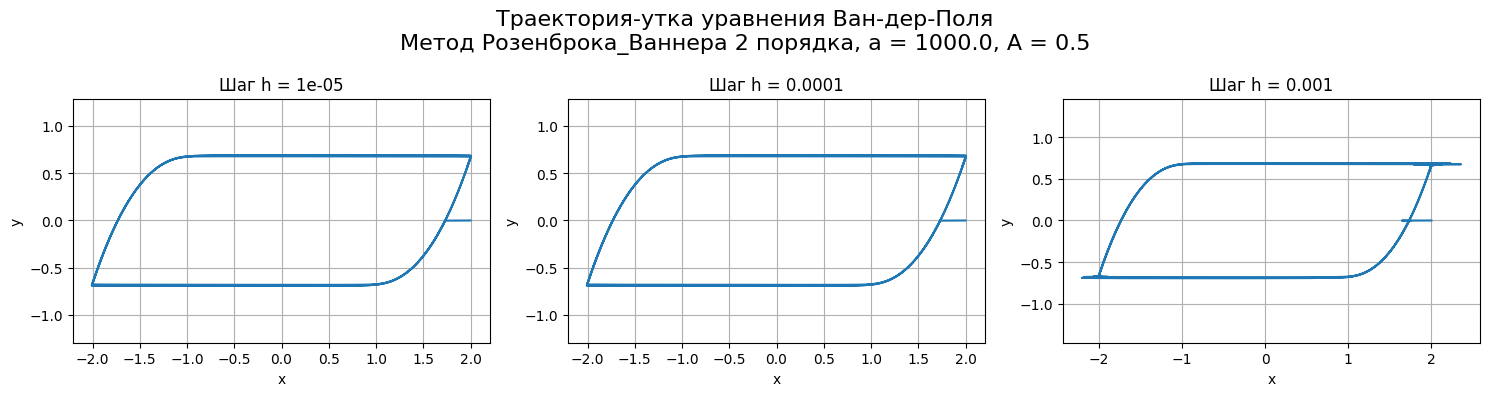

In [100]:
drawing(integrate_rosenbrock, f, Y0, t_start=t_0, t_stop=t_1, order=2, a=a1, A=A1, llen=3)
